In [ ]:
# Перед вами данные взаимодействий с рекламными объявлениями на некоторой площадке за 6 дней. И таблица 
# с характеристиками рекламных клиентов (тех, кто разместил эти объявления).


# Задачи

#     Разберемся с распределением количества показов и кликов. Посчитайте среднее количество показов 
#      и среднее количество кликов на объявления за весь период (округлите до целых).
    
#     Нарисуйте график распределения показов на объявление за весь период.
   
#     Давайте посчитаем скользящее среднее показов с окном 2. Какое значение скользящего среднего получим 
#      за 6 апреля 2019 года (ответ округлите до целых)?
    
#     Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один 
#      график значения арифметического среднего по дням и скользящего среднего количества показов. В какой день 
#      наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых 
#      скользящее среднее равно NaN, не учитываем. 
    
#     *Напишите функцию, которая найдет проблемное объявление (с наибольшим/наименьшим количеством показов) в день, 
#      в который была замечена самая большая по модулю аномалия. 
    
#     Теперь подгрузим данные по рекламным клиентам и найдем среднее количество дней от даты создания рекламного 
#      клиента и первым запуском рекламного объявления этим клиентом.
    
#     Вычислите конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней. 
#      Ответ дайте в процентах и округлите до сотых. (Фильтровать нужно по значению в формате pd.Timedelta(365, unit='d'))
    
#     Давайте разобъем наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30. 
#      Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего 
#      существования (от 0 до 30 дней). Список промежутков для метода pd.cut – [0, 30, 90, 180, 365]
    
#     А теперь – выведем на график эти категории с количеством уникальных клиентов в них.

# Описание данных

# ads_data.csv – данные взаимодействий с рекламными объявлениями

#     date – дата
#     time – время
#     event – действие (просмотр/клик)
#     platform – платформа
#     ad_id – id объявления
#     client_union_id – id рекламного кабинета
#     campaign_union_id – id рекламной кампании
#     ad_cost_type – тип оплаты
#     ad_cost – цена
#     has_video – есть ли видео
#     target_audience_count – размер аудитории

# ads_clients_data.csv – характеристики рекламных клиентов

#     date – дата
#     client_union_id – id рекламного кабинета
#     community_id – id сообщества
#     create_date – дата создания рекламного клиента

In [ ]:
#     Разберемся с распределением количества показов и кликов. Посчитайте среднее количество показов 
#      и среднее количество кликов на объявления за весь период (округлите до целых).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
ads_data = pd.read_csv('ads_data.csv')
ads_data

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501
...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929


In [3]:
ads_clients_data = pd.read_csv('ads_clients_data.csv')
ads_clients_data

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08
...,...,...,...,...
122073,2020-05-07,122074,-130470790,2018-12-21
122074,2020-05-07,122075,-130911261,2018-11-09
122075,2020-05-07,122076,-130494912,2018-10-27
122076,2020-05-07,122077,-130910585,2018-12-05


In [4]:
ads_data_mean = ads_data \
    .groupby(['ad_id', 'event'], as_index=False) \
    .agg({'client_union_id': 'count'}) \
    .pivot(index='ad_id', columns='event', values='client_union_id').reset_index() \
    .fillna(0)
ads_data_mean

event,ad_id,click,view
0,2,1.0,101.0
1,3,3.0,184.0
2,1902,1.0,41.0
3,2064,0.0,35.0
4,2132,1.0,58.0
...,...,...,...
960,122004,4.0,100.0
961,122013,0.0,156.0
962,122023,0.0,68.0
963,122031,1.0,138.0


In [5]:
ads_data_mean.describe()

event,ad_id,click,view
count,965.000000,965.000000,965.000000
mean,57971.024870,113.137824,923.131606
std,38810.046681,3404.699975,12945.945595
min,2.000000,0.000000,0.000000
25%,29768.000000,0.000000,35.000000
50%,43179.000000,1.000000,82.000000
75%,107250.000000,3.000000,208.000000
max,122078.000000,105767.000000,351802.000000


In [6]:
#     Нарисуйте график распределения показов на объявление за весь период.

In [7]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [53]:
ads_data_mean['view_log'] = np.log(ads_data_mean.view)
ads_data_mean

C:\Program Files (x86)\Anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log



event,ad_id,click,view,view_log
0,2,1.0,101.0,4.615121
1,3,3.0,184.0,5.214936
2,1902,1.0,41.0,3.713572
3,2064,0.0,35.0,3.555348
4,2132,1.0,58.0,4.060443
...,...,...,...,...
960,122004,4.0,100.0,4.605170
961,122013,0.0,156.0,5.049856
962,122023,0.0,68.0,4.219508
963,122031,1.0,138.0,4.927254


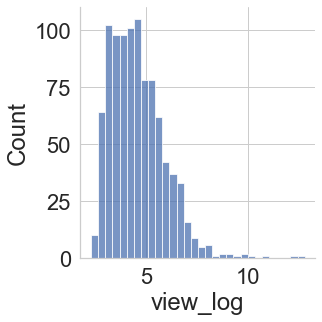

In [54]:
sns.displot(ads_data_mean.view_log)

In [10]:
#     Теперь нужно найти среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления, 
#     у которых не было показов (обычное среднее). 
#     Давайте посчитаем скользящее среднее показов с окном 2. Какое значение скользящего среднего получим 
#     за 6 апреля 2019 года (ответ округлите до целых)? 

In [55]:
ads_data_day_roll = ads_data \
    .query("event == 'view'") \
    .groupby(['date', 'ad_id']) \
    .agg({'event': 'count'}) \
    .groupby('date') \
    .agg({'event': 'mean'}) \
    .rolling(2).mean() \
    .rename(columns={'event': 'skolz'})
ads_data_day_roll

,skolz
date,
2019-04-01,NaN
2019-04-02,146.134626
2019-04-03,150.869880
2019-04-04,419.927249
2019-04-05,797.505699
2019-04-06,598.116202


In [12]:
#     Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один 
#      график значения арифметического среднего по дням и скользящего среднего количества показов. В какой день 
#      наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых 
#      скользящее среднее равно NaN, не учитываем. 

In [58]:
ads_data_day_mean = ads_data \
    .query("event == 'view'") \
    .groupby(['date', 'ad_id']) \
    .agg({'event': 'count'}) \
    .groupby('date') \
    .agg({'event': 'mean'}) \
    .rename(columns={'event': 'sred'})
ads_data_day_mean

,sred
date,
2019-04-01,154.482270
2019-04-02,137.786982
2019-04-03,163.952778
2019-04-04,675.901720
2019-04-05,919.109677
2019-04-06,277.122727


In [59]:
ads_data_day_mean_rol = ads_data_day_mean.merge(ads_data_day_roll, on='date')
ads_data_day_mean_rol

,sred,skolz
date,,
2019-04-01,154.482270,NaN
2019-04-02,137.786982,146.134626
2019-04-03,163.952778,150.869880
2019-04-04,675.901720,419.927249
2019-04-05,919.109677,797.505699
2019-04-06,277.122727,598.116202


<AxesSubplot:xlabel='date', ylabel='sred'>

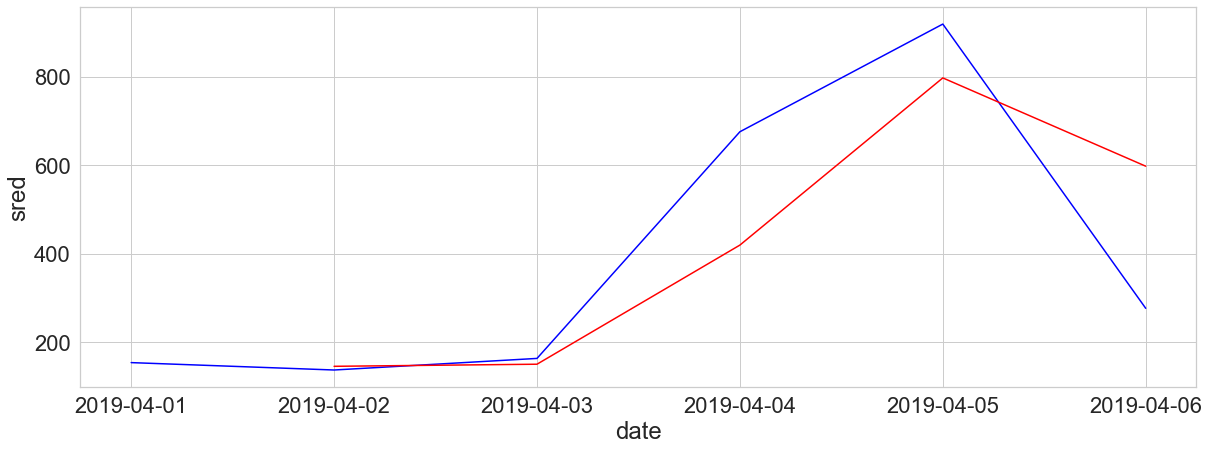

In [60]:
sns.lineplot(data=ads_data_day_mean_rol['sred'], color='Blue')
sns.lineplot(data=ads_data_day_mean_rol['skolz'], color='Red')

In [61]:
ads_data_day_mean_rol['delta'] = (ads_data_day_mean_rol.sred - ads_data_day_mean_rol.skolz).abs()
ads_data_day_mean_rol

,sred,skolz,delta
date,,,
2019-04-01,154.482270,NaN,NaN
2019-04-02,137.786982,146.134626,8.347644
2019-04-03,163.952778,150.869880,13.082898
2019-04-04,675.901720,419.927249,255.974471
2019-04-05,919.109677,797.505699,121.603979
2019-04-06,277.122727,598.116202,320.993475


In [17]:
#     Теперь подгрузим данные по рекламным клиентам и найдем среднее количество дней от даты создания рекламного 
#      клиента и первым запуском рекламного объявления этим клиентом.

In [18]:
ads_data_all = ads_data.merge(ads_clients_data, on='client_union_id')
ads_data_all

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-04,2019-04-04 18:07:25,view,web,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04
999996,2019-04-04,2019-04-04 18:29:06,view,ios,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04
999997,2019-04-04,2019-04-04 18:55:46,view,web,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04
999998,2019-04-04,2019-04-04 19:21:09,view,android,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04


In [19]:
ads_data_all.dtypes

date_x                    object
time                      object
event                     object
platform                  object
ad_id                      int64
client_union_id            int64
campaign_union_id          int64
ad_cost_type              object
ad_cost                  float64
has_video                  int64
target_audience_count      int64
date_y                    object
community_id               int64
create_date               object
dtype: object

In [20]:
ads_data_all.date_x = pd.to_datetime(ads_data_all.date_x)

In [21]:
ads_data_all.date_y = pd.to_datetime(ads_data_all.date_y)

In [22]:
ads_data_all.create_date = pd.to_datetime(ads_data_all.create_date)

In [23]:
ads_data_all.dtypes

date_x                   datetime64[ns]
time                             object
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
date_y                   datetime64[ns]
community_id                      int64
create_date              datetime64[ns]
dtype: object

In [24]:
ads_data_all['date_delta'] = ads_data_all.date_x - ads_data_all.create_date 
ads_data_all

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date,date_delta
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-04,2019-04-04 18:07:25,view,web,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31 days
999996,2019-04-04,2019-04-04 18:29:06,view,ios,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31 days
999997,2019-04-04,2019-04-04 18:55:46,view,web,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31 days
999998,2019-04-04,2019-04-04 19:21:09,view,android,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31 days


In [76]:
date_delta_mean = ads_data_all \
    .groupby('client_union_id', as_index=False) \
    .agg({'date_delta': 'min'}) \
    .sort_values('date_delta')
date_delta_mean

,client_union_id,date_delta
665,108678,26 days
196,21194,28 days
520,38094,28 days
353,24853,28 days
745,116173,29 days
...,...,...
402,27495,247 days
738,115819,247 days
300,23334,249 days
187,21101,249 days


In [77]:
date_delta_mean.date_delta.mean()

Timedelta('124 days 09:04:43.532219570')

In [ ]:
#     Вычислите конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней. 
#     Ответ дайте в процентах и округлите до сотых. (Фильтровать нужно по значению в формате pd.Timedelta(365, unit='d'))

In [49]:
date_delta_mean[date_delta_mean.date_delta < pd.Timedelta(365, unit='d')]

,client_union_id,date_delta
665,108678,26 days
196,21194,28 days
520,38094,28 days
353,24853,28 days
745,116173,29 days
...,...,...
402,27495,247 days
738,115819,247 days
300,23334,249 days
187,21101,249 days


In [96]:
date_delta_mean_do = date_delta_mean[date_delta_mean.date_delta < pd.Timedelta(365, unit='d')].shape[0]
date_delta_mean_do

838

In [89]:
ads_clients_data.client_union_id.nunique()

122078

In [98]:
round(date_delta_mean_do / ads_clients_data.client_union_id.nunique() *100, 2)

0.69

In [ ]:
#     Давайте разобъем наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30. 
#      Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего 
#      существования (от 0 до 30 дней). Список промежутков для метода pd.cut – [0, 30, 90, 180, 365]

In [28]:
date_delta_mean_30 = date_delta_mean
date_delta_mean_30['inter'] = pd.cut(date_delta_mean_30.date_delta,bins = pd.to_timedelta(['0d', '30d', '90d', '180d', '365d']))
date_delta_mean_30

,date_delta,inter
client_union_id,,
108678,26 days,"(0 days 00:00:00, 30 days 00:00:00]"
21194,28 days,"(0 days 00:00:00, 30 days 00:00:00]"
38094,28 days,"(0 days 00:00:00, 30 days 00:00:00]"
24853,28 days,"(0 days 00:00:00, 30 days 00:00:00]"
116173,29 days,"(0 days 00:00:00, 30 days 00:00:00]"
...,...,...
27495,247 days,"(180 days 00:00:00, 365 days 00:00:00]"
115819,247 days,"(180 days 00:00:00, 365 days 00:00:00]"
23334,249 days,"(180 days 00:00:00, 365 days 00:00:00]"


In [29]:
date_delta_mean_30 = date_delta_mean_30.reset_index() 
date_delta_mean_30

,client_union_id,date_delta,inter
0,108678,26 days,"(0 days 00:00:00, 30 days 00:00:00]"
1,21194,28 days,"(0 days 00:00:00, 30 days 00:00:00]"
2,38094,28 days,"(0 days 00:00:00, 30 days 00:00:00]"
3,24853,28 days,"(0 days 00:00:00, 30 days 00:00:00]"
4,116173,29 days,"(0 days 00:00:00, 30 days 00:00:00]"
...,...,...,...
833,27495,247 days,"(180 days 00:00:00, 365 days 00:00:00]"
834,115819,247 days,"(180 days 00:00:00, 365 days 00:00:00]"
835,23334,249 days,"(180 days 00:00:00, 365 days 00:00:00]"
836,21101,249 days,"(180 days 00:00:00, 365 days 00:00:00]"


In [32]:
date_delta_mean_30_graf = date_delta_mean_30 \
    .groupby('inter', as_index=False) \
    .agg({'client_union_id': 'nunique'})
date_delta_mean_30_graf

,inter,client_union_id
0,"(0 days 00:00:00, 30 days 00:00:00]",11
1,"(30 days 00:00:00, 90 days 00:00:00]",263
2,"(90 days 00:00:00, 180 days 00:00:00]",396
3,"(180 days 00:00:00, 365 days 00:00:00]",168


In [ ]:
#     А теперь – выведем на график эти категории с количеством уникальных клиентов в них.

<AxesSubplot:xlabel='client_union_id', ylabel='inter'>

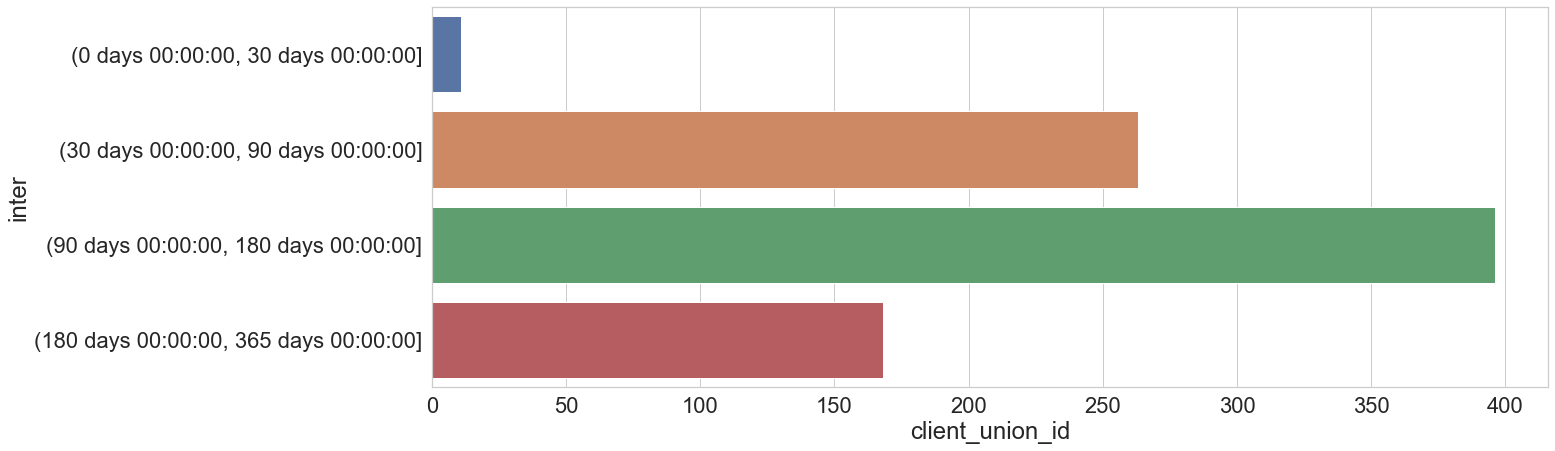

In [34]:
sns.barplot(x="client_union_id", y="inter", data=date_delta_mean_30_graf)